# Full Simulation (vibes)

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import display

# === Simulation Parameters ===
N_TURTLES = 1000
N_SIMULATIONS = 1000

first_bid = 250
second_bid = 250
    
avg_second_bid = 250

# === Reserve Price Distribution ===
def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

# === Monte Carlo Simulation ===
results = []

for sim in tqdm(range(N_SIMULATIONS), desc="Simulating"):
    reserve_prices = sample_reserve_prices(N_TURTLES)
    
    pnl = 0
    for reserve in reserve_prices:
        if first_bid >= reserve and second_bid >= first_bid: # First bid wins
            pnl += 320 - first_bid
            
        elif second_bid >= reserve and first_bid >= second_bid: # Second bid wins
            if second_bid > avg_second_bid:
                pnl += 320 - second_bid
            else:
                p = ((320 - avg_second_bid) / (320 - second_bid)) ** 3
                pnl += (320 - second_bid) * p

    results.append({
        "sim": sim,
        "first_bid": first_bid,
        "second_bid": second_bid,
        "avg_other_second_bid": avg_second_bid,
        "Total PNL": pnl
    })

df_results = pd.DataFrame(results)
display(df_results.head())

Simulating: 100%|██████████| 1000/1000 [00:00<00:00, 5609.91it/s]


,sim,first_bid,second_bid,avg_other_second_bid,Total PNL
0,0,250,250,250,35000
1,1,250,250,250,35000
2,2,250,250,250,35000
3,3,250,250,250,35000
4,4,250,250,250,35000


# One bid scenario

Simulating: 100%|██████████| 1000/1000 [00:00<00:00, 2646.49it/s]


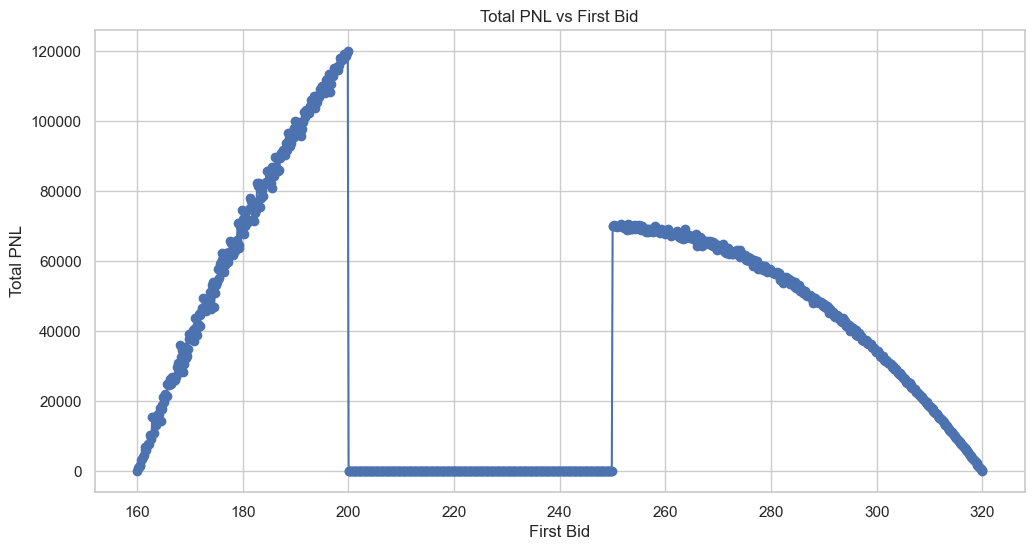

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import display

# === Simulation Parameters ===
N_TURTLES = 2000 # ~ real will be around 2k
N_SIMULATIONS = 1000 

bids = np.linspace(160, 320, N_SIMULATIONS)


# === Reserve Price Distribution ===
def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

# === Monte Carlo Simulation ===
results = []

for sim in tqdm(range(N_SIMULATIONS), desc="Simulating"):
    reserve_prices = sample_reserve_prices(N_TURTLES)
    first_bid = bids[sim]
    
    pnl = 0
    for reserve in reserve_prices:
        if first_bid >= reserve and (first_bid<200 or first_bid>250): # First bid wins
            pnl += 320 - first_bid

    results.append({
        "sim": sim,
        "first_bid": first_bid,
        "Total PNL": pnl
    })

# Graph the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.title("Total PNL vs First Bid")
plt.xlabel("First Bid")
plt.ylabel("Total PNL")
plt.plot(bids, [result["Total PNL"] for result in results], marker='o', linestyle='-')
plt.grid(True)
plt.show()

# Two bid scenario (no p)

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import display

# === Simulation Parameters ===
N_TURTLES = 2000 # ~ real will be around 2k
N_SIMULATIONS = 160 # ^2 in this scenario

first_bids = np.linspace(160, 320, N_SIMULATIONS)
second_bids = np.linspace(160, 320, N_SIMULATIONS)

# === Reserve Price Distribution ===
def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

# === Monte Carlo Simulation ===
results = []
for sim_1 in tqdm(range(N_SIMULATIONS), desc="Simulating"):
    for sim_2 in range(N_SIMULATIONS):
        reserve_prices = sample_reserve_prices(N_TURTLES)
        first_bid = bids[sim_1]
        second_bid = bids[sim_2]
        
        pnl = 0
        for reserve in reserve_prices:
            if first_bid >= reserve and second_bid >= first_bid: # First bid wins
                if (first_bid>200 and first_bid<250): # Turtles dont trade
                    continue    
                pnl += 320 - first_bid
                
            elif second_bid >= reserve and first_bid >= second_bid: # Second bid wins
                if (second_bid>200 and second_bid<250): # Turtles dont trade
                    continue   
                pnl += (320 - second_bid)

        results.append({
            "sim": sim,
            "first_bid": first_bid,
            "second_bid": second_bid,
            "Total PNL": pnl
        })

import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Pivot to create a grid of PNL values
pivot_df = df_results.pivot(index="first_bid", columns="second_bid", values="Total PNL")

# Plotting heatmap
plt.figure(figsize=(12, 8))
plt.title("Total PNL Heatmap (No p-penalty Scenario)")
plt.xlabel("Second Bid")
plt.ylabel("First Bid")
heatmap = plt.imshow(pivot_df.values, origin="lower", aspect="auto",
                     extent=[pivot_df.columns.min(), pivot_df.columns.max(),
                             pivot_df.index.min(), pivot_df.index.max()],
                     cmap="viridis")
plt.colorbar(heatmap, label="Total PNL")
plt.tight_layout()
plt.show()


Simulating:   0%|          | 2/1000 [00:00<04:27,  3.73it/s]


NameError: name 'p' is not defined